In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lamarck = pd.read_csv("./Lamarck_budget.csv", header=0, index_col=[0,1])
print(lamarck)

# path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/SSGA/SSGA_rawdata.csv"
# SSGA = pd.read_csv(path,header=0,index_col=[0,1])
# print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/Baldwin/Baldwin_budget.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0,1])
print(baldwin.shape)

df_together = pd.concat([lamarck,baldwin],axis=0,keys=["Lamarck","Baldwin"])
# df_together = pd.concat([lamarck,SSGA],axis=0,keys=["Lamarck","SSGA"])
print(df_together.shape)
df_together = df_together.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
print(df_together.dtypes)

                  590        593       579       588       589       591  \
F1  Times1   225772.0   283012.0  138209.0  247093.0  257737.0  259000.0   
    Times2   290452.0   229957.0  169916.0  217006.0  198400.0  215650.0   
    Times3   229936.0   265837.0  138275.0  220966.0  218404.0  228697.0   
    Times4   236383.0   256837.0  190316.0  197788.0  258037.0  178039.0   
    Times5   248767.0   285475.0  205472.0  198790.0  224041.0  234811.0   
...               ...        ...       ...       ...       ...       ...   
F23 Times6    87016.0   532420.0  254381.0  156967.0  177118.0  102688.0   
    Times7    91054.0   174478.0   87908.0  170638.0   87724.0   95734.0   
    Times8   157096.0    52021.0  101090.0   43129.0  146926.0   74596.0   
    Times9   114754.0  3000097.0   54485.0   74764.0  166390.0  168331.0   
    Times10   76486.0   119122.0  597929.0   64432.0  206425.0  904579.0   

                   576       587        569       558       592        572  \
F1  Times

Lamarck  F1   Times1   590     225772.0
                       593     283012.0
                       579     138209.0
                       588     247093.0
                       589     257737.0
                                ...    
Baldwin  F23  Times10  562    3000097.0
                       575      40529.0
                       573     105383.0
                       552     577696.0
                       555     279067.0
Length: 9200, dtype: float64

,Function,Combinations,Mode,Times,solutions
0,F1,590,Lamarck,Times1,225772.0
1,F1,593,Lamarck,Times1,283012.0
2,F1,579,Lamarck,Times1,138209.0
3,F1,588,Lamarck,Times1,247093.0
4,F1,589,Lamarck,Times1,257737.0
...,...,...,...,...,...
9195,F23,562,Baldwin,Times10,3000097.0
9196,F23,575,Baldwin,Times10,40529.0
9197,F23,573,Baldwin,Times10,105383.0
9198,F23,552,Baldwin,Times10,577696.0


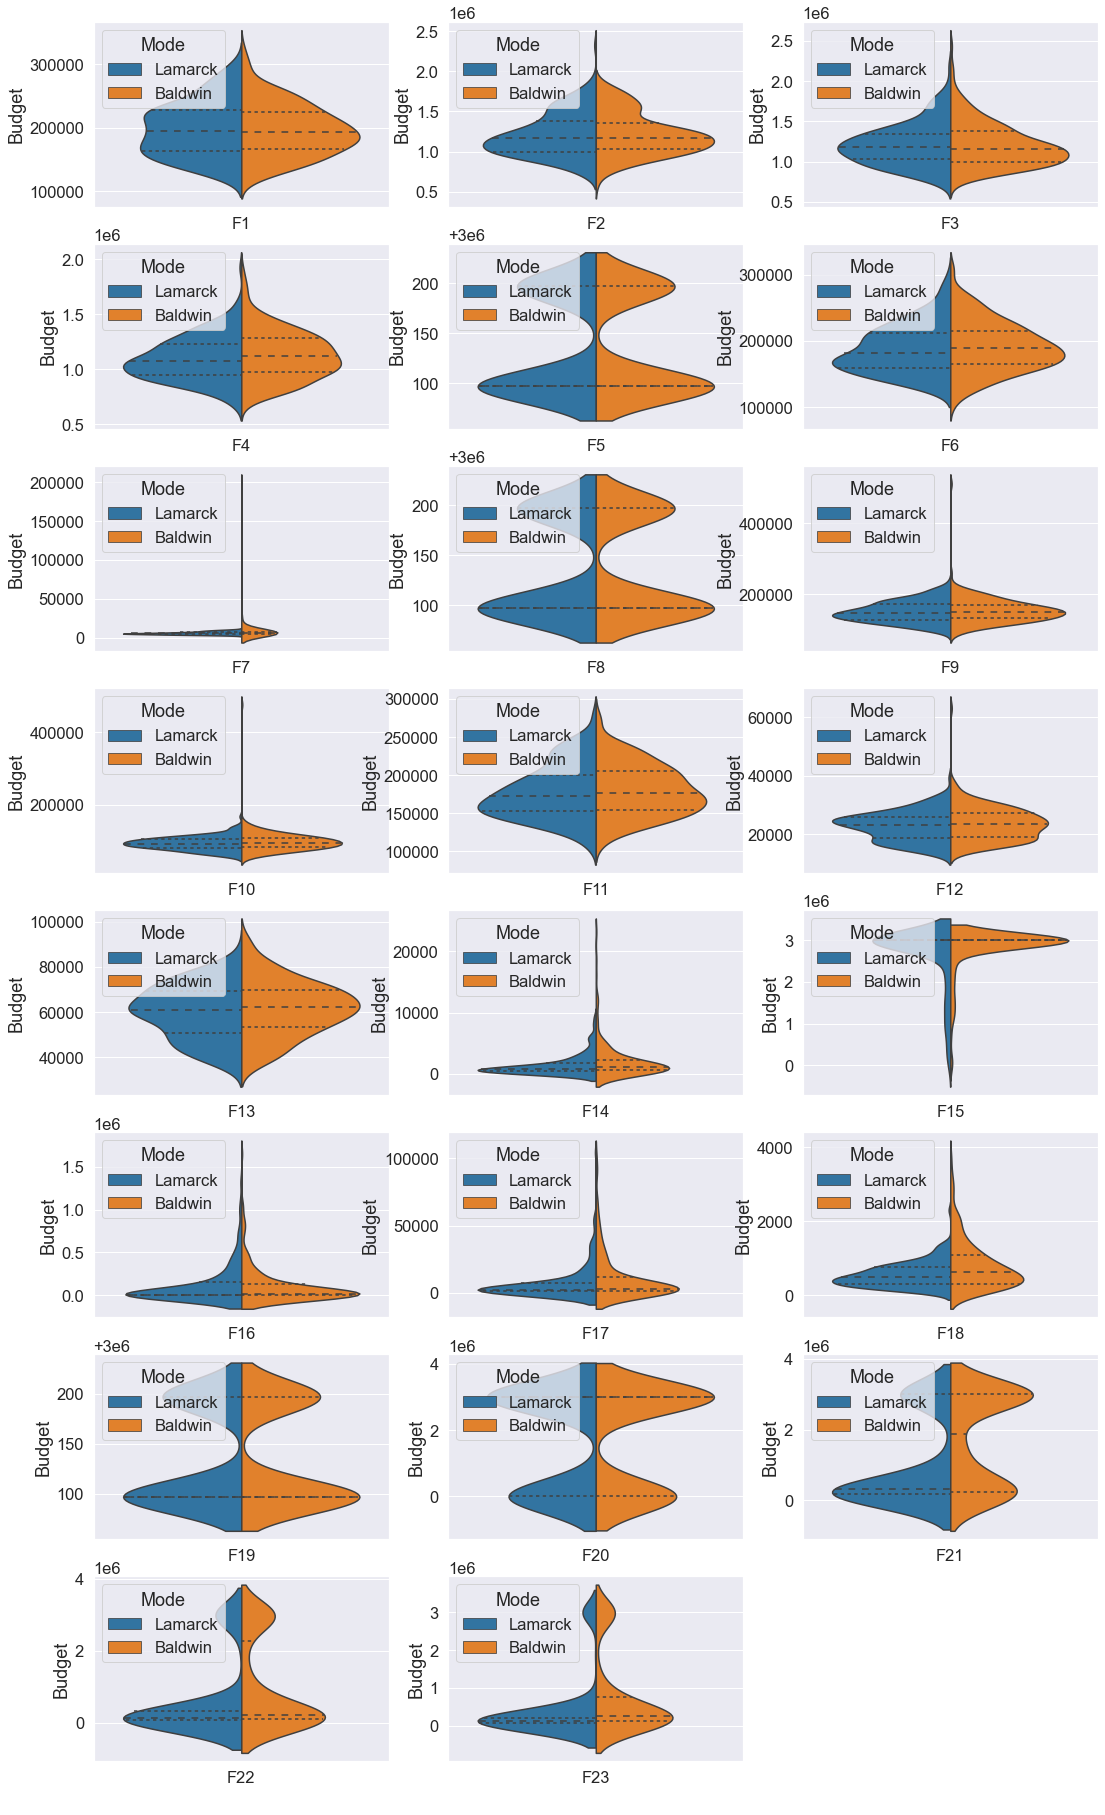

In [22]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="solutions")
dataframe["solutions"] = dataframe["solutions"].replace("NAN", 0)
dataframe["solutions"] = pd.to_numeric(dataframe["solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
# function_list = ["F" + str(i) for i in [21,22,23]]
function_list = ["F" + str(i) for i in range(1, 24, 1)]
# opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
def show_graph(dataframe):
    sns.set(font_scale=1.5)
    dist_cols = 3
    dist_rows = 8
    plt.figure(figsize=(6 * dist_cols, 4 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        # data = dataf[dataf["Times"] == ("Mean")]
        plt.subplot(dist_rows, dist_cols, i)
        ax= sns.violinplot(data=dataf, y="solutions",palette="tab10",x="Function",hue="Mode",inner="quartiles",split=True)
        # ax= sns.stripplot(data=dataf, y="solutions",palette="viridis",x="Function",hue="Mode",color="white", edgecolor="gray")
        # ax= sns.boxplot(data=dataf, y="solutions",x="Function",hue="Mode",width=0.15)
        # ax= sns.jointplot(data=data, y="solutions",x="Function",hue="Mode")
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
        plt.xlabel(" ")
        # sns.violinplot(data=dataf, y="solutions",x="Function",hue="Mode")
        # plt.title(f"Optimal:{opt[i-1]}")
        # plt.title(f"Optimal:{opt[i-1]}")
        # ax.set_yticklabels(ax.get_yticks(), size = 20)
        plt.ylabel("Budget")
        i = i + 1
    plt.savefig("./together_budget_12{0}.png".format("lamarck_SSGA_Baldwin"), dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

Lamarck  F1   Times1   590     225772.0
                       593     283012.0
                       579     138209.0
                       588     247093.0
                       589     257737.0
                                ...    
Baldwin  F23  Times10  562    3000097.0
                       575      40529.0
                       573     105383.0
                       552     577696.0
                       555     279067.0
Length: 9200, dtype: float64

,Function,Combinations,Mode,Times,solutions
0,F1,590,Lamarck,Times1,225772.0
1,F1,593,Lamarck,Times1,283012.0
2,F1,579,Lamarck,Times1,138209.0
3,F1,588,Lamarck,Times1,247093.0
4,F1,589,Lamarck,Times1,257737.0
...,...,...,...,...,...
9195,F23,562,Baldwin,Times10,3000097.0
9196,F23,575,Baldwin,Times10,40529.0
9197,F23,573,Baldwin,Times10,105383.0
9198,F23,552,Baldwin,Times10,577696.0


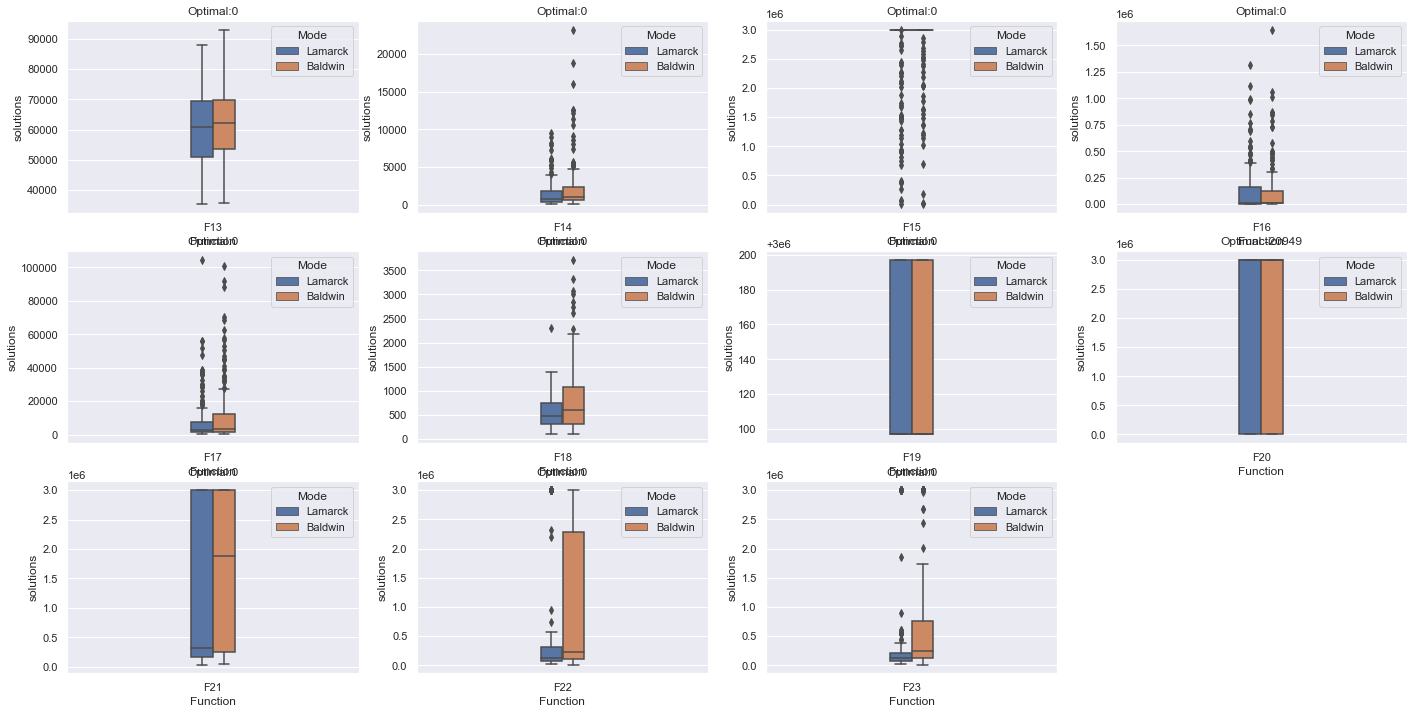

In [15]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="solutions")
dataframe["solutions"] = pd.to_numeric(dataframe["solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
def show_graph(dataframe):
    sns.set()
    dist_cols = 4
    dist_rows = 3
    plt.figure(figsize=(6 * dist_cols, 4 * dist_rows))
    i = 1
    for function in function_list[12:]:
        dataf = dataframe[dataframe["Function"] == function]
        # data = dataf[dataf["Times"] == ("Mean" or "Min")]
        plt.subplot(dist_rows, dist_cols, i)
        # sns.violinplot(data=dataf, y="solutions",palette="viridis",x="Function",hue="Mode",split=True,inner="stick")
        sns.boxplot(data=dataf, y="solutions",x="Function",hue="Mode",width=0.15)
        # plt.axhline(y=opt[i-1],color="red")
        # sns.violinplot(data=dataf, y="solutions",x="Function",hue="Mode")
        plt.title(f"Optimal:{opt[i-1]}")
        # plt.title(f"Optimal:{opt[i-1]}")
        # ax.set_yticklabels(ax.get_yticks(), size = 20)
        plt.ylabel("solutions")
        i = i + 1
    plt.savefig("./together_budget_12{0}.png".format("lamarck_SSGA_Baldwin"), dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [ ]:
global_opt = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -20949.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 0.00034, -1.03155, 0.3985, 3.5, -3.855, -3.315,
                    -10.15315, -10.40275, -10.53625]
df_opt = dataframe.copy()
cdf=[]
for f in range(1,24,1):
    opt = global_opt[f-1]
    f = "F"+str(f)
    dataf = df_opt[df_opt["Function"] == f]
    dataf["solutions"] = opt
    cdf.append(dataf)
cdf = pd.concat(cdf,axis=0)
cdf.rename(columns={'solutions': 'optimal'}, inplace=True)
print(cdf)

In [ ]:
def show_graph(dataframe):
    sns.set()
    dist_cols = 3
    dist_rows = 8
    plt.figure(figsize=(5 * dist_cols, 5 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        dataf2 = cdf[cdf["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        sns.boxplot(data=dataf, y="solutions", x="Function",hue="Mode",palette="viridis")
        # sns.scatterplot(data=dataf2,y="optimal",x="Function",color ="red")
        plt.axhline(y=global_opt[i-1],color="red")
        plt.xlabel(" ")
        plt.ylabel("solutions")
        i = i + 1
    plt.savefig("./together_solutions_optimal_{0}.pdf".format("lamarck_SSGA_Baldwin"), dpi=1200)
    plt.show()
show_graph(dataframe=dataframe)